# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.combine import SMOTETomek
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import recall_score, precision_score

# Dataset

In [2]:
dataset = pd.read_csv('creditcard.csv')

# Exploratory Data Analysis
# Checking if there is NULL values anywhere in the dataset
print('Null values in Dataset : ',int(np.any(dataset.isna().any())))

# Scaling 'Amount' Feature since its having a different range 
dataset['Amount'] = StandardScaler().fit_transform(dataset['Amount'].values.reshape(-1,1))

# Features
X = dataset.drop(['Time','Class'], axis=1) # Dropping Time since its of no use
# Target Class
y = dataset['Class']

print('Number of Observations in the dataset : ', X.shape[0])
print('Number of Features to be used : ', X.shape[1])
print(f'Fraud cases : {sum(y)}         {np.round(sum(y)/X.shape[0]*100, 3)}%')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Null values in Dataset :  0
Number of Observations in the dataset :  284807
Number of Features to be used :  29
Fraud cases : 492         0.173%


# Random Forest Function to calculate performance metrics

In [15]:
Scores = {  'sample' : [],
            'precision' : [],
            'recall' : []
        }

def Report(X, y, x_test, y_test):
    
    '''
    print('-------------- Training Data --------------')
    print(f'X train : {X_train.shape}      y train : {len(y_train)}')
    print(f'Fraud cases : {sum(y_train)}         {np.round(sum(y_train)/X_train.shape[0]*100, 3)}%')
    print('---------------- Test Data ----------------')
    print(f'X test : {X_test.shape}        y test : {len(y_test)}')
    print(f'Fraud cases : {sum(y_test)}          {np.round(sum(y_test)/X_test.shape[0]*100, 3)}%')
    '''

    model = RandomForestClassifier(random_state=42)
    #y_pred = cross_val_predict(model, X_train, y_train, cv=5)
    
    model.fit(X, y)
    y_pred = model.predict(x_test)

    return precision_score(y_test, y_pred), recall_score(y_test, y_pred)


# Random Over Sampler

In [16]:
over = RandomOverSampler(sampling_strategy=0.7, random_state=42)
X_res, y_res = over.fit_resample(X_train, y_train)
print('Oversampled dataset shape %s' % Counter(y_res))
precision, recall = Report(X_res, y_res, X_test, y_test)
Scores['precision'].append(precision)
Scores['recall'].append(recall)
Scores['sample'].append('ROS')

Oversampled dataset shape Counter({0: 227451, 1: 159215})


# Oversampling minority class using SMOTE

In [17]:
''' Run-Time of Cell : 3min '''
over = SMOTE(sampling_strategy=0.7, random_state=42)
X_res, y_res = over.fit_resample(X_train, y_train)
print('Oversampled dataset shape %s' % Counter(y_res))
precision, recall = Report(X_res, y_res, X_test, y_test)
Scores['precision'].append(precision)
Scores['recall'].append(recall)
Scores['sample'].append('SMOTE')

Oversampled dataset shape Counter({0: 227451, 1: 159215})


# Undersampling Majority class using RandomUnderSampler

In [18]:
under = RandomUnderSampler(sampling_strategy=0.7, random_state=42)
X_res, y_res = under.fit_resample(X_train, y_train)
print('Undersampled dataset shape %s' % Counter(y_res))
precision, recall = Report(X_res, y_res, X_test, y_test)
Scores['precision'].append(precision)
Scores['recall'].append(recall)
Scores['sample'].append('RUS')

Undersampled dataset shape Counter({0: 562, 1: 394})


# Near Miss

In [19]:
under = NearMiss(sampling_strategy=0.7)
X_res, y_res = under.fit_resample(X_train, y_train)
print('Undersampled dataset shape %s' % Counter(y_res))
precision, recall = Report(X_res, y_res, X_test, y_test)
Scores['precision'].append(precision)
Scores['recall'].append(recall)
Scores['sample'].append('NearMiss')

Undersampled dataset shape Counter({0: 562, 1: 394})


# ROS + RUS

In [20]:
over = RandomOverSampler(sampling_strategy=0.4, random_state=42)
X_res, y_res = over.fit_resample(X_train, y_train)
print('Oversampled dataset shape %s' % Counter(y_res))

under = RandomUnderSampler(sampling_strategy=0.7, random_state=42)
X_res, y_res = under.fit_resample(X_res, y_res)
print('Undersampled dataset shape %s' % Counter(y_res))

precision, recall = Report(X_res, y_res, X_test, y_test)
Scores['precision'].append(precision)
Scores['recall'].append(recall)
Scores['sample'].append('ROS+RUS')

Oversampled dataset shape Counter({0: 227451, 1: 90980})
Undersampled dataset shape Counter({0: 129971, 1: 90980})


# ROS + Near Miss

In [21]:
''' Run-Time of Cell : 5min 25s '''
over = RandomOverSampler(sampling_strategy=0.4, random_state=42)
X_res, y_res = over.fit_resample(X_train, y_train)
print('Oversampled dataset shape %s' % Counter(y_res))

under = NearMiss(sampling_strategy=0.7)
X_res, y_res = under.fit_resample(X_res, y_res)
print('Undersampled dataset shape %s' % Counter(y_res))

precision, recall = Report(X_res, y_res, X_test, y_test)
Scores['precision'].append(precision)
Scores['recall'].append(recall)
Scores['sample'].append('ROS+NearMiss')

Oversampled dataset shape Counter({0: 227451, 1: 90980})
Undersampled dataset shape Counter({0: 129971, 1: 90980})


# SMOTE + RUS

In [22]:
over = SMOTE(sampling_strategy=0.4, random_state=42)
X_res, y_res = over.fit_resample(X_train, y_train)
print('Oversampled dataset shape %s' % Counter(y_res))

under = RandomUnderSampler(sampling_strategy=0.7, random_state=42)
X_res, y_res = under.fit_resample(X_res, y_res)
print('Undersampled dataset shape %s' % Counter(y_res))

precision, recall = Report(X_res, y_res, X_test, y_test)
Scores['precision'].append(precision)
Scores['recall'].append(recall)
Scores['sample'].append('SMOTE+RUS')

Oversampled dataset shape Counter({0: 227451, 1: 90980})
Undersampled dataset shape Counter({0: 129971, 1: 90980})


# SMOTE + Near Miss

In [23]:
''' Run-Time of Cell : 6min '''
over = SMOTE(sampling_strategy=0.4, random_state=42)
X_res, y_res = over.fit_resample(X_train, y_train)
print('Oversampled dataset shape %s' % Counter(y_res))

under = NearMiss(sampling_strategy=0.7)
X_res, y_res = under.fit_resample(X_res, y_res)
print('Undersampled dataset shape %s' % Counter(y_res))

precision, recall = Report(X_res, y_res, X_test, y_test)
Scores['precision'].append(precision)
Scores['recall'].append(recall)
Scores['sample'].append('SMOTE+NearMiss')

Oversampled dataset shape Counter({0: 227451, 1: 90980})
Undersampled dataset shape Counter({0: 129971, 1: 90980})


# SMOTETomek

In [21]:
''' Run-Time of Cell : 25mins '''
over = SMOTETomek(sampling_strategy=0.2, tomek=TomekLinks(sampling_strategy="majority"), random_state=42, n_jobs=-1)
X_res, y_res = over.fit_resample(X_train, y_train)
print('Oversampled dataset shape %s' % Counter(y_res))
precision, recall = Report(X_res, y_res)
Scores['precision'].append(precision)
Scores['recall'].append(recall)
Scores['sample'].append('SMOTETomek')

Oversampled dataset shape Counter({0: 284315, 1: 56863})


# Visualize Precision and Recall scores

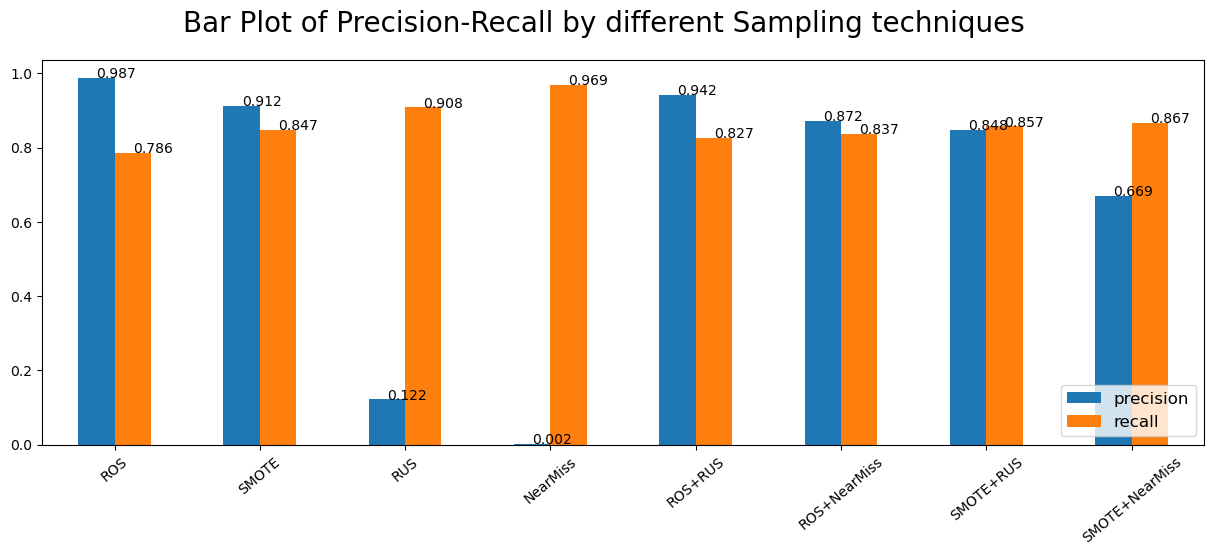

In [24]:
%matplotlib inline
df = pd.DataFrame(Scores)
fig, ax = plt.subplots()
df.plot.bar(x = 'sample',y = ['precision', 'recall'], rot=40, ax=ax)
plt.legend(loc=4)
ax.set(xlabel=None)
plt.suptitle('Bar Plot of Precision-Recall by different Sampling techniques')
plt.rc('legend', fontsize=12)
plt.rc('figure', titlesize=20)
fig.set_figwidth(15)
fig.set_figheight(5)
for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=3), (p.get_x()+p.get_width()/2., p.get_height()))